In [154]:
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

plt.style.use("Solarize_Light2")

from datetime import datetime

## Loading Data

In [155]:
def dateparse(time_in_secs):    
    return datetime.fromtimestamp(float(time_in_secs))

df = pd.read_csv("./data/train.csv", 
                 parse_dates=["deadline", "created_at", "launched_at"], 
                 date_parser=dateparse)
df.head()

,id,photo,name,blurb,goal,slug,disable_communication,country,currency,currency_symbol,...,location,category,profile,urls,source_url,friends,is_starred,is_backing,permissions,state
0,663816109,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Angular - Where Modern Art meets Cards,Angular is a minimalist card design for simpli...,17380.0,angular-where-modern-art-meets-cards,False,US,USD,$,...,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,failed
1,1462931821,"{""small"":""https://ksr-ugc.imgix.net/assets/014...",Ladybeard is KAWAII-CORE,Original songs and music videos to jump start ...,24000.0,ladybeard-is-kawaii-core,False,US,USD,$,...,"{""country"":""JP"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,failed
2,1724358498,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Vegan Cafe Delivery Service in Vancouver BC,Our project is to launch a vegan lunch deliver...,40000.0,vegancafeca,False,CA,CAD,$,...,"{""country"":""CA"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,failed
3,314918941,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Photoetched Rail Yard Exposition,I have developed a process of my own which tra...,1000.0,photoetched-rail-yard-exposition,False,US,USD,$,...,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,successful
4,1766165140,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Cinnamon Fletcher needs to be brought to life!,Need to pay an illustrator to bring my childre...,700.0,cinnamon-fletcher-needs-to-be-brought-to-life,False,GB,GBP,Â£,...,"{""country"":""GB"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,failed


In [156]:
df.loc[:, ["deadline", "created_at", "launched_at"]].head()

,deadline,created_at,launched_at
0,2016-03-29 21:27:09,2016-02-19 01:29:23,2016-02-28 21:27:09
1,2017-01-11 05:00:00,2016-10-04 09:14:28,2016-12-05 14:00:54
2,2014-08-20 16:47:08,2014-07-13 03:34:43,2014-07-21 16:47:08
3,2013-03-24 00:28:34,2013-02-12 00:09:38,2013-02-22 01:28:34
4,2013-10-24 08:33:21,2013-09-20 20:15:02,2013-09-24 08:33:21


## Features Engineering

In [157]:
drop_cols = [k for k, v in dict(df.isna().sum()).items() if v > int(df.shape[0] * 0.2)]
df.drop(drop_cols, axis=1, inplace=True)
df.dropna(inplace=True)
df.isna().sum()

id                        0
photo                     0
name                      0
blurb                     0
goal                      0
slug                      0
disable_communication     0
country                   0
currency                  0
currency_symbol           0
currency_trailing_code    0
deadline                  0
created_at                0
launched_at               0
static_usd_rate           0
creator                   0
location                  0
category                  0
profile                   0
urls                      0
source_url                0
state                     0
dtype: int64

#### Binary Outcomes

In [158]:
state_encodings = {v:k for k, v in enumerate(df.state.unique())}

def encode_state(x):
    return state_encodings[x]

df.loc[:, "state"] = df.state.apply(encode_state)
df.head(10)

,id,photo,name,blurb,goal,slug,disable_communication,country,currency,currency_symbol,...,created_at,launched_at,static_usd_rate,creator,location,category,profile,urls,source_url,state
0,663816109,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Angular - Where Modern Art meets Cards,Angular is a minimalist card design for simpli...,17380.0,angular-where-modern-art-meets-cards,False,US,USD,$,...,2016-02-19 01:29:23,2016-02-28 21:27:09,1.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,0
1,1462931821,"{""small"":""https://ksr-ugc.imgix.net/assets/014...",Ladybeard is KAWAII-CORE,Original songs and music videos to jump start ...,24000.0,ladybeard-is-kawaii-core,False,US,USD,$,...,2016-10-04 09:14:28,2016-12-05 14:00:54,1.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""JP"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,0
2,1724358498,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Vegan Cafe Delivery Service in Vancouver BC,Our project is to launch a vegan lunch deliver...,40000.0,vegancafeca,False,CA,CAD,$,...,2014-07-13 03:34:43,2014-07-21 16:47:08,0.926746,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""CA"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,0
3,314918941,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Photoetched Rail Yard Exposition,I have developed a process of my own which tra...,1000.0,photoetched-rail-yard-exposition,False,US,USD,$,...,2013-02-12 00:09:38,2013-02-22 01:28:34,1.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,1
4,1766165140,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Cinnamon Fletcher needs to be brought to life!,Need to pay an illustrator to bring my childre...,700.0,cinnamon-fletcher-needs-to-be-brought-to-life,False,GB,GBP,Â£,...,2013-09-20 20:15:02,2013-09-24 08:33:21,1.602384,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""GB"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,0
5,1549710695,"{""small"":""https://ksr-ugc.imgix.net/assets/015...",Disassembling - A Colouring Book,Disassembling is a colouring book full of diss...,4000.0,disassembling-a-colouring-book,False,AU,AUD,$,...,2017-02-07 10:58:41,2017-02-17 20:26:02,0.771304,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""AU"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,1
6,1167950746,"{""small"":""https://ksr-ugc.imgix.net/assets/011...","All-Night Yahtzee's ""Boots n' Cats"" Album",All-Night Yahtzee is planning on releasing our...,1000.0,all-night-

In [159]:
df.columns.values

array(['id', 'photo', 'name', 'blurb', 'goal', 'slug',
       'disable_communication', 'country', 'currency', 'currency_symbol',
       'currency_trailing_code', 'deadline', 'created_at', 'launched_at',
       'static_usd_rate', 'creator', 'location', 'category', 'profile',
       'urls', 'source_url', 'state'], dtype=object)

In [160]:
keep_cols = ['country', 'category', 'static_usd_rate', 'goal', 'deadline',
             'launched_at', 'location', 'state']
df_main = df.loc[:, keep_cols].copy()
df_main

,country,category,static_usd_rate,goal,deadline,launched_at,location,state
0,US,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",1.000000,17380.0,2016-03-29 21:27:09,2016-02-28 21:27:09,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...",0
1,US,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",1.000000,24000.0,2017-01-11 05:00:00,2016-12-05 14:00:54,"{""country"":""JP"",""urls"":{""web"":{""discover"":""htt...",0
2,CA,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",0.926746,40000.0,2014-08-20 16:47:08,2014-07-21 16:47:08,"{""country"":""CA"",""urls"":{""web"":{""discover"":""htt...",0
3,US,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",1.000000,1000.0,2013-03-24 00:28:34,2013-02-22 01:28:34,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...",1
4,GB,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",1.602384,700.0,2013-10-24 08:33:21,2013-09-24 08:33:21,"{""country"":""GB"",""urls"":{""web"":{""discover"":""htt...",0
5,AU,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",0.771304,4000.0,2017-03-19 19:26:02,2017-02-17 20:26:02,"{""country"":""AU"",""urls"":{""web"":{""discover"":""htt...",1
6,US,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",1.000000,1000.0,2012-02-29 04:59:00,2012-02-06 22:14:48,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...",1
7,US,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",1.000000,7000.0,2014-06-14 01:00:32,2014-05-15 01:00:32,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...",1
8,US,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",1.000000,550.0,2014-09-12 03:06:43,2014-08-13 03:06:43,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...",1
9,US,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",1.000000,3500.0,2015-08-14 04:59:00,2015-07-13 23:44:58,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...",1


#### Static USD Rate
We can use the ```static_usd_rate``` to convert each ```goal``` amount to the same currency.

In [161]:
convert_to_usd = lambda x: x.static_usd_rate * x.goal

cols = ["static_usd_rate", "goal"]

df_main.loc[:, "goal_adjusted"] = df_main.loc[:, cols].apply(convert_to_usd, axis=1)
df_main.goal_adjusted.head()

0    17380.000000
1    24000.000000
2    37069.850800
3     1000.000000
4     1121.669045
Name: goal_adjusted, dtype: float64

#### Duration of Fund Raiser
Instead of using the ```deadline``` and ```launched_at``` on their own, we can find the number of days the Kickstarter was active for.

In [162]:
df_main.loc[:, "duration"] = (df_main.deadline - df_main.launched_at).apply(lambda x: x.days)
df_main.duration.head()

0    30
1    36
2    30
3    29
4    30
Name: duration, dtype: int64

#### Discretization of Goals
Put the value for the goals into buckets.

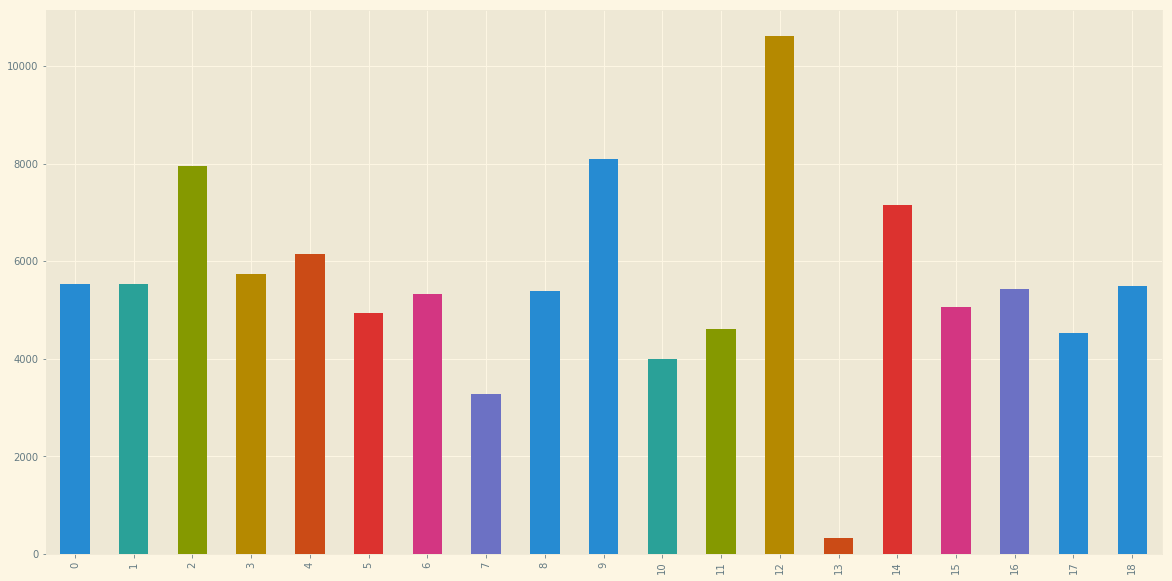

In [163]:
bins = 19
df_main.loc[:, "goal_bucket"] = pd.qcut(df_main.goal_adjusted, bins, labels=range(0, bins))
df_main.goal_bucket.value_counts(sort=False).plot.bar(figsize=(20, 10))

#### Categories
We need to get the actual category from the json object.

In [175]:
from json import loads

def get_category(x):
    category = loads(x)["slug"]    
    return pd.Series(category.split("/"))
    
categories = df_main.category.apply(get_category)
categories.rename(columns={0: "topic", 1: "sub_category"}, inplace=True)
categories.head()

,topic,sub_category
0,games,playing cards
1,music,pop
2,food,vegan
3,art,mixed media
4,publishing,children's books


In [177]:
print(categories.topic.unique(), categories.sub_category.unique())

['games' 'music' 'food' 'art' 'publishing' 'journalism' 'film & video'
 'design' 'comics' 'fashion' 'photography' 'crafts' 'dance' 'technology'] ['playing cards' 'pop' 'vegan' 'mixed media' "children's books"
 'art books' 'video games' 'sculpture' 'video' 'narrative film' 'fiction'
 'hip-hop' 'documentary' 'jazz' 'academic' 'drinks' 'shorts'
 'country & folk' 'spaces' 'nonfiction' 'horror' 'animation'
 'interactive design' 'print' 'classical music' 'indie rock'
 'illustration' 'poetry' 'comic books' 'product design' 'radio & podcasts'
 'web' 'bacon' 'food trucks' 'painting' 'webseries' 'live games' 'apparel'
 'graphic design' 'accessories' 'photobooks' 'tabletop games' 'puzzles'
 'woodworking' 'performances' 'restaurants' 'rock' 'footwear'
 'world music' 'drama' 'webcomics' 'electronic music' 'fantasy' 'kids'
 'public art' 'graphic novels' 'performance art' 'jewelry' 'stationery'
 'events' 'small batch' '3d printing' 'nature' 'mobile games' 'fine art'
 'comedy' 'places' 'young adult' '

In [178]:
df_main = df_main.merge(categories, left_index=True, right_index=True, how='outer')
df_main.head()

,country,category,static_usd_rate,goal,deadline,launched_at,location,state,goal_adjusted,duration,goal_bucket,topic_x,sub_category_x,topic_y,sub_category_y,topic,sub_category
0,US,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",1.000000,17380.0,2016-03-29 21:27:09,2016-02-28 21:27:09,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...",0,17380.000000,30,15,games,playing cards,games,playing cards,games,playing cards
1,US,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",1.000000,24000.0,2017-01-11 05:00:00,2016-12-05 14:00:54,"{""country"":""JP"",""urls"":{""web"":{""discover"":""htt...",0,24000.000000,36,16,music,pop,music,pop,music,pop
2,CA,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",0.926746,40000.0,2014-08-20 16:47:08,2014-07-21 16:47:08,"{""country"":""CA"",""urls"":{""web"":{""discover"":""htt...",0,37069.850800,30,17,food,vegan,food,vegan,food,vegan
3,US,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",1.000000,1000.0,2013-03-24 00:28:34,2013-02-22 01:28:34,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...",1,1000.000000,29,2,art,mixed media,art,mixed media,art,mixed media
4,GB,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",1.602384,700.0,2013-10-24 08:33:21,2013-09-24 08:33:21,"{""country"":""GB"",""urls"":{""web"":{""discover"":""htt...",0,1121.669045,30,3,publishing,children's books,publishing,children's books,publishing,children's books


### Final Column Selection

In [179]:
cols = ["country", "duration", "goal_adjusted", "topic", "sub_category", "state"]
df = df_main.loc[:, cols]
df.head()

,country,duration,goal_adjusted,topic,sub_category,state
0,US,30,17380.000000,games,playing cards,0
1,US,36,24000.000000,music,pop,0
2,CA,30,37069.850800,food,vegan,0
3,US,29,1000.000000,art,mixed media,1
4,GB,30,1121.669045,publishing,children's books,0


In [180]:
# One hot encoding
cols.remove("state")
cols.remove("duration")
cols.remove("goal_adjusted")
df = pd.get_dummies(df, columns=cols)
print(df.shape)
df.head()

(105126, 164)


,duration,goal_adjusted,state,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,...,sub_category_video games,sub_category_weaving,sub_category_web,sub_category_webcomics,sub_category_webseries,sub_category_woodworking,sub_category_workshops,sub_category_world music,sub_category_young adult,sub_category_zines
0,30,17380.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,24000.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30,37069.850800,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29,1000.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30,1121.669045,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Baseline Models

In [181]:
cols = list(df.columns.values)
cols.remove("state")

train_size = int(len(df) * 0.8)

X_test, y_test = df.loc[train_size:, cols], df.state.loc[train_size:]
X_train, y_train = df.loc[:train_size, cols], df.state.loc[:train_size]

f"X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}"

'X_train: (83721, 163), y_train: (83721,), X_test: (21406, 163), y_test: (21406,)'

In [182]:
train_size = int(len(X_train) * 0.8)

X_val, y_val = X_train.loc[train_size:, :], y_train.loc[train_size:]
X_train, y_train = X_train.loc[:train_size, :], y_train.loc[:train_size]

f"X_train: {X_train.shape}, y_train: {y_train.shape}, X_val: {X_val.shape}, y_val: {y_val.shape}"

'X_train: (66681, 163), y_train: (66681,), X_val: (17041, 163), y_val: (17041,)'

In [183]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    training_pred = model.predict(X_train)
    validation_pred = model.predict(X_val)
    return {"name": str(model),
            "training_accuracy": accuracy_score(training_pred, y_train), 
            "validation_accuracy": accuracy_score(validation_pred, y_val)}
    
estimators = [RandomForestClassifier(n_estimators=200, random_state=42), 
              AdaBoostClassifier(DecisionTreeClassifier(max_depth=10), n_estimators=200, random_state=42), 
              GradientBoostingClassifier(n_estimators=200, random_state=42)]

for e in estimators:
    acc = evaluate_model(e, X_train, y_train, X_val, y_val)
    print(acc)
    print()

{'name': "RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n            max_depth=None, max_features='auto', max_leaf_nodes=None,\n            min_impurity_decrease=0.0, min_impurity_split=None,\n            min_samples_leaf=1, min_samples_split=2,\n            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,\n            oob_score=False, random_state=42, verbose=0, warm_start=False)", 'training_accuracy': 0.9007513384622307, 'validation_accuracy': 0.6942667683821372}

{'name': "AdaBoostClassifier(algorithm='SAMME.R',\n          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,\n            max_features=None, max_leaf_nodes=None,\n            min_impurity_decrease=0.0, min_impurity_split=None,\n            min_samples_leaf=1, min_samples_split=2,\n            min_weight_fraction_leaf=0.0, presort=False, random_state=None,\n            splitter='best'),\n          learning_rate=1.0, n_estimators=200, random_st

## Gradient Boosting Classifier

In [197]:
from sklearn.metrics import mean_squared_error

training_loss = []
validation_loss = []

for n_est in range(100, 400, 10):
    print(n_est, end=", ")
    gbc_clf = GradientBoostingClassifier(n_estimators=n_est, random_state=42)
    gbc_clf.fit(X_train, y_train)
    val_pred = gbc_clf.predict(X_val)
    train_pred = gbc_clf.predict(X_train)
    validation_loss.append(mean_squared_error(val_pred, y_val))
    training_loss.append(mean_squared_error(train_pred, y_train))

100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 

In [205]:
# plt.rcParams['figure.figsize'] = (20, 10)
# plt.title("Validation Error")
# plt.plot(range(100, 400, 10), training_loss, label="training")
# plt.plot(range(100, 400, 10), validation_loss, label="validation")
# plt.legend()
# plt.ylabel("Relative Loss")
# plt.xlabel("Number of Estimators")
# plt.plot()
# plt.savefig("./grad_boosting_estimators.jpeg")

![Gradient Boosting Estimators](./grad_boosting_estimators.jpeg)

In [216]:
gbc_clf = GradientBoostingClassifier(n_estimators=500, random_state=42)
gbc_clf.fit(X_train, y_train)
val_pred = gbc_clf.predict(X_val)
train_pred = gbc_clf.predict(X_train)

df_results = pd.DataFrame({'Accuracy': [accuracy_score(train_pred, y_train), 
                                        accuracy_score(val_pred, y_val)],
                           'Relative Loss': [mean_squared_error(train_pred, y_train), 
                                          mean_squared_error(val_pred, y_val)]})
df_results.rename({0: 'Training', 1: 'Validation'}, axis='index', inplace=True)
df_results

,Accuracy,Relative Loss
Training,0.734857,0.265143
Validation,0.734757,0.265243
